# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we visualize four activation maps in a CNN layer.


### 1. Import the Image

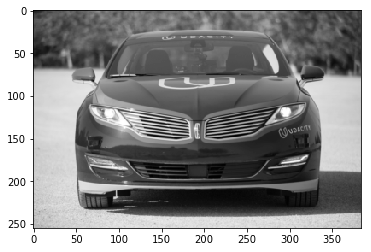

In [1]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'images/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

### 2. Specify the Filters

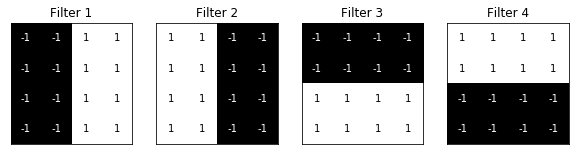

In [27]:
import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### 3. Visualize the Activation Maps for Each Filter

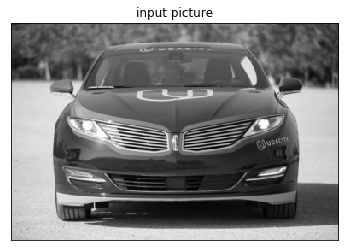

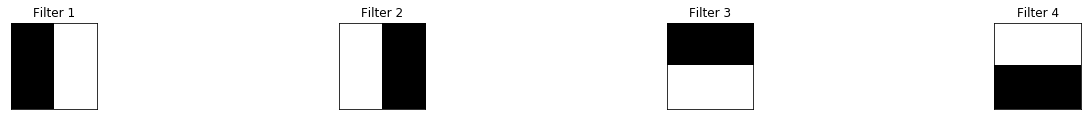

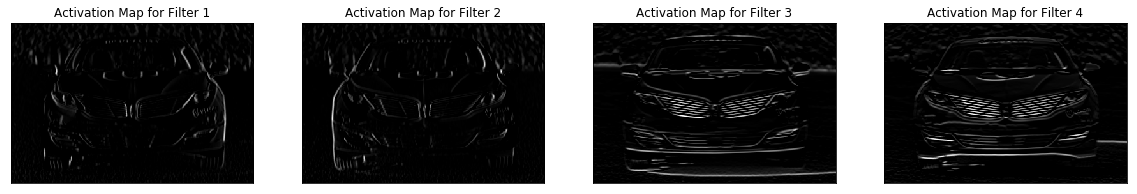

In [18]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
#import matplotlib.cm as cm

### plot input image
# plt.imshow(small_img, cmap='gray')
fig = plt.figure() # figsize=(12, 6)
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(small_img, cmap='gray')
ax.set_title('input picture')

### visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

### CNN is built here
# define a neural network with a single convolutional layer with one filter
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1)))

# apply convolutional filter (run CNN) and return activation map
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # apply filter
    activation_map = model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))
    return activation_map

### visualize all activation maps
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    activation_map = apply_filter(small_img, i, filters, ax)
    # plot the corresponding activation map
    ax.imshow(np.squeeze(activation_map), cmap='gray')
    ax.set_title('Activation Map for Filter %s' % str(i+1))

## Data dimentions in CNN
See simple CNN below. We will not train this CNN; instead, we'll use it to study how the dimensionality of the convolutional layer changes, as a function of the supplied arguments. Note, 3rd dimention in output data, the **depth** of the convolutional layer will always equal the number of filters K.


`
input_shape
(200, 200, 1) 200x200 pc 1 byte gray
(128, 128, 3) 128x128 pc 3 RGB colors
`

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, Conv2D

model = Sequential()
model.add(Convolution2D(16, (4, 4), strides=2, padding='valid', activation='relu', input_shape=(200, 200, 1)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 99, 99, 16)        272       
Total params: 272.0
Trainable params: 272
Non-trainable params: 0.0
_________________________________________________________________


**conv-dims.py** as in quiz.

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', 
    activation='relu', input_shape=(128, 128, 3)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
Total params: 896.0
Trainable params: 896
Non-trainable params: 0.0
_________________________________________________________________
